## Preprocessing

In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import datetime
import os
#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(['EIN', 'NAME'], axis=1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [ ]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
application_value = application_df['APPLICATION_TYPE'].value_counts()
application_value

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [5]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
# import numpy as np
# cutoff = 9
# application_df['application_types_to_replace'] = np.where(application_df['APPLICATION_TYPE']<=cutoff , np.nan, application_df['APPLICATION_TYPE'])
application_types_to_replace = list(application_value[application_value<200].index)
# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# Look at CLASSIFICATION value counts for binning
CLASSIFICATION_value = application_df['CLASSIFICATION'].value_counts()
CLASSIFICATION_value

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<Axes: ylabel='Density'>

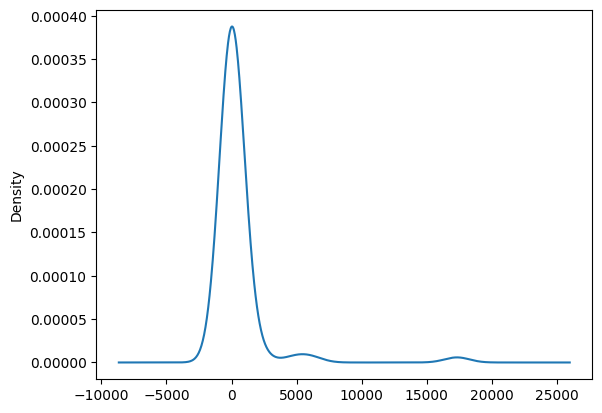

In [7]:
# You may find it helpful to look at CLASSIFICATION value counts >1
CLASSIFICATION_value.plot(kind='density')

In [8]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(CLASSIFICATION_value[CLASSIFICATION_value<1800].index)
# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [9]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df = pd.get_dummies(application_df, dtype=float)
application_df

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34295,1,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34296,1,5000,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34297,1,5000,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [10]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

<ipython-input-10-f199198450cb>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = application_df.drop(["IS_SUCCESSFUL"],1).values


In [11]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

**Step 1**: The Preprocessing

After loading and conducting an initial review of the charity_data.csv, identifying the features and target became the first step to complete. As noted above, in this case the IS_SUCCESSFUL column was deemed to be our target. The EIN and NAME columns were considered to be extraneous information and columns that we could remove from the dataset by way of the .drop function. The remaining columns were then designated as our features.

1) What variable(s) are the target(s) for your model?
 ------ IS_SUCCESSFUL

2) What variable(s) are the features for your model? ------
APPLICATION_TYPE, 
AFFILIATION, 
CLASSIFICATION, 
USE_CASE, 
ORGANIZATION, 
STATUS, 
INCOME_AMT, 
SPECIAL_CONSIDERATIONS, 
ASK_AMT.

3) What variable(s) should be removed from the input data because they are neither targets nor features?------
EIN and NAME.

* Once identified and the extraneous columns dropped, the remaining columns were further cleaned by determining the number of unique values for each through the use of the .nunique() function and binning outlier values for certain columns into catchall bins labelled "Other". In this case, this was achieved by way of applying .value_counts on the APPLICATION_TYPE and CLASSIFICATION columns and creating respective cut off values for each (<500 and <300) where the value would be replaced with the "Other" designation by way of the .replace function.

* Upon confirming the Dtypes with .info(), we next created a categorical variable list of columns which were converted and encoded using the pd.get_dummies function. The resultant encoded_df was then merged with the original application_df, dropping the original column values in the process.

* With our data now cleaned, it was seperated into X and y based on our features and target designations. It was next split into training (X_train, y_train) and testing (X_test, y_test) datasets using the train_test_split function. StandardScaler() variables were instantiated and the X_train data was fit to the scaler and then scaled concurrently but seperate from the X_test data using the .transform function.

Attempt # 1

**Step 2** ## Compile, Train and Evaluate the Model

**Step 3:** The Deep Learningtep 2:

Attempt 1: Optimization A:

The nnopt_a again used 44 input features, but we thought trying a more robust model might yield improved results. As such, two more hidden layers were added bringing the total to 3. We also increased the number of neurons per layer to 80,60 and 30 respectively (ReLu remained the activation function throughout the hidden layers). The summary revealed 10,241 total trainable parameters with this model which would be run on an increased 70 epochs this time. The resulting evaluation indicated we'd been able to improve the accuracy to 72.66% (0.7266) and reduce the loss to 55.4% (0.5540).


In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 60
hidden_nodes_layer3= 30

nn1 = tf.keras.models.Sequential()
# First hidden layer
nn1.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn1.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))
# Third hidden layer
nn1.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))

# Output layer
nn1.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn1.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_131 (Dense)           (None, 80)                3520      
                                                                 
 dense_132 (Dense)           (None, 60)                4860      
                                                                 
 dense_133 (Dense)           (None, 30)                1830      
                                                                 
 dense_134 (Dense)           (None, 1)                 31        
                                                                 
Total params: 10,241
Trainable params: 10,241
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model 
nn1.compile(loss="binary_crossentropy", optimizer="adam", metrics= ["accuracy"])

# Create a Callback that saves the weights every 5 epochs
import os
from tensorflow.keras.callbacks import ModelCheckpoint
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"
cp_callback= ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True, save_freq=5)

# Train the model
fit_model= nn1.fit(X_train_scaled, y_train, epochs=70, verbose=1, callbacks=[cp_callback])

# Evaluate Results
model_loss, model_accuracy= nn1.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss:{model_loss}, Accuracy: {model_accuracy}")

Epoch 1/70
804/804 [==============================] - 3s 3ms/step - loss: 0.5696 - accuracy: 0.7228
Epoch 2/70
804/804 [==============================] - 3s 3ms/step - loss: 0.5545 - accuracy: 0.7318
Epoch 3/70
804/804 [==============================] - 2s 3ms/step - loss: 0.5522 - accuracy: 0.7325
Epoch 4/70
804/804 [==============================] - 2s 3ms/step - loss: 0.5506 - accuracy: 0.7336
Epoch 5/70
804/804 [==============================] - 2s 3ms/step - loss: 0.5495 - accuracy: 0.7343
Epoch 6/70
804/804 [==============================] - 2s 3ms/step - loss: 0.5481 - accuracy: 0.7350
Epoch 7/70
804/804 [==============================] - 3s 3ms/step - loss: 0.5480 - accuracy: 0.7338
Epoch 8/70
804/804 [==============================] - 2s 3ms/step - loss: 0.5474 - accuracy: 0.7355
Epoch 9/70
804/804 [==============================] - 2s 3ms/step - loss: 0.5467 - accuracy: 0.7356
Epoch 10/70
804/804 [==============================] - 2s 3ms/step - loss: 0.5454 - accuracy: 0.7360

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn1.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5541 - accuracy: 0.7266 - 231ms/epoch - 862us/step
Loss: 0.5540736317634583, Accuracy: 0.7266472578048706


In [ ]:
# Export our model to HDF5 file

import h5py
from tensorflow import keras
nn1.save("AlphabetSoupCharity.h5")



Attempt # 2

Attempt 2: Optimization B:

The nnopt_b model again used 44 input features. Based on the improvement of nnopt_a over our original model, we thought we'd try a similar approach of increased complexity across the board. Another one hidden layers were added, bringing the total to 4. We also again increased the number of neurons per layer to 33, 17, 33, 11 respectively (Relu was applied to the four hidden layers ). The summary revealed 2,339 total trainable parameters. We also again increased the epochs to 100. The resulting evaluation indicated we'd been again able to improve the accuracy, this time to 72.54% (0.7354). The loss was returned as 56% (0.5575).


In [12]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  22
hidden_nodes_layer2 = 17
hidden_nodes_layer3 = 33
hidden_nodes_layer4 = 11
nn2 = tf.keras.models.Sequential()

# First hidden layer
nn2.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn2.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))
# Third hidden layer
nn2.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))
# fourth hidden layer
nn2.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Output layer
nn2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 22)                968       
                                                                 
 dense_1 (Dense)             (None, 17)                391       
                                                                 
 dense_2 (Dense)             (None, 33)                594       
                                                                 
 dense_3 (Dense)             (None, 11)                374       
                                                                 
 dense_4 (Dense)             (None, 1)                 12        
                                                                 
Total params: 2,339
Trainable params: 2,339
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Compile the model 
nn2.compile(loss="binary_crossentropy", optimizer="adam", metrics= ["accuracy"])

# Create a Callback that saves the weights every 5 epochs
import os
from tensorflow.keras.callbacks import ModelCheckpoint
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"
cp_callback= ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True, save_freq=5)

# Train the model
fit_model= nn2.fit(X_train_scaled, y_train, epochs=100, verbose=1, callbacks=[cp_callback])

# Evaluate Results
model_loss, model_accuracy= nn2.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss:{model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
804/804 [==============================] - 4s 3ms/step - loss: 0.5750 - accuracy: 0.7205
Epoch 2/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5560 - accuracy: 0.7305
Epoch 3/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5527 - accuracy: 0.7317
Epoch 4/100
804/804 [==============================] - 5s 7ms/step - loss: 0.5510 - accuracy: 0.7324
Epoch 5/100
804/804 [==============================] - 6s 8ms/step - loss: 0.5490 - accuracy: 0.7339
Epoch 6/100
804/804 [==============================] - 6s 7ms/step - loss: 0.5487 - accuracy: 0.7330
Epoch 7/100
804/804 [==============================] - 5s 6ms/step - loss: 0.5483 - accuracy: 0.7342
Epoch 8/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5476 - accuracy: 0.7336
Epoch 9/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5465 - accuracy: 0.7358
Epoch 10/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5463 - accura

In [15]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5576 - accuracy: 0.7254 - 290ms/epoch - 1ms/step
Loss: 0.5575636029243469, Accuracy: 0.7253644466400146


Attempt : 3

Attempt 3: Optimization C:

nnopt_c, again used the 44 input features. While nnopt_b did improve over nnopt_a, the change was minor. We thought we'd try more layers this time and change the neurons to hopefully finetune it and find a middle ground as greater complexity does not necesarily always equate to a better model. A hidden layer was removed, reducing the total to 5. The number of neurons per layer this time were 33, 22, 33, 11, 18 respectively (ReLu was applied for first  3 layers and 2 layers of tanh in this model). The summary revealed a slightly lower total of trainable parameters at 5,237. They would again be tested at 200 epochs. The resulting evaluation indicated we'd gone backward in both accuracy, achieving 72.60% (0.7257), and loss with 55.70% (0.5573).



In [17]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  33
hidden_nodes_layer2 = 22
hidden_nodes_layer3 = 33
hidden_nodes_layer4 = 11
hidden_nodes_layer6 = 18
nn3 = tf.keras.models.Sequential()

# First hidden layer
nn3.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn3.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))
# Third hidden layer
nn3.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))
# fourth hidden layer
nn3.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))
# fifth hidden layer
nn3.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))

# Output layer
nn3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn3.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 33)                1452      
                                                                 
 dense_6 (Dense)             (None, 22)                748       
                                                                 
 dense_7 (Dense)             (None, 33)                759       
                                                                 
 dense_8 (Dense)             (None, 33)                1122      
                                                                 
 dense_9 (Dense)             (None, 33)                1122      
                                                                 
 dense_10 (Dense)            (None, 1)                 34        
                                                                 
Total params: 5,237
Trainable params: 5,237
Non-traina

In [18]:
# Compile the model 
nn3.compile(loss="binary_crossentropy", optimizer="adam", metrics= ["accuracy"])

# Create a Callback that saves the weights every 5 epochs
import os
from tensorflow.keras.callbacks import ModelCheckpoint
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"
cp_callback= ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True, save_freq=5)

# Train the model
fit_model= nn3.fit(X_train_scaled, y_train, epochs=200, verbose=1, callbacks=[cp_callback])

# Evaluate Results
model_loss, model_accuracy= nn3.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss:{model_loss}, Accuracy: {model_accuracy}")

Epoch 1/200
804/804 [==============================] - 6s 5ms/step - loss: 0.5724 - accuracy: 0.7175
Epoch 2/200
804/804 [==============================] - 3s 4ms/step - loss: 0.5555 - accuracy: 0.7292
Epoch 3/200
804/804 [==============================] - 4s 5ms/step - loss: 0.5529 - accuracy: 0.7298
Epoch 4/200
804/804 [==============================] - 3s 4ms/step - loss: 0.5512 - accuracy: 0.7325
Epoch 5/200
804/804 [==============================] - 3s 4ms/step - loss: 0.5500 - accuracy: 0.7335
Epoch 6/200
804/804 [==============================] - 3s 4ms/step - loss: 0.5497 - accuracy: 0.7334
Epoch 7/200
804/804 [==============================] - 3s 4ms/step - loss: 0.5487 - accuracy: 0.7345
Epoch 8/200
804/804 [==============================] - 3s 4ms/step - loss: 0.5483 - accuracy: 0.7341
Epoch 9/200
804/804 [==============================] - 3s 4ms/step - loss: 0.5477 - accuracy: 0.7348
Epoch 10/200
804/804 [==============================] - 4s 5ms/step - loss: 0.5469 - accura

In [20]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn3.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5573 - accuracy: 0.7257 - 272ms/epoch - 1ms/step
Loss: 0.5573004484176636, Accuracy: 0.7257142663002014


Attempt: 4

Our final optimization model, nnopt_c, again used the 44 input features. While nnopt_b did improve over nnopt_a, the change was minor. We thought we'd try less layers this time and change the neurons to hopefully finetune it and find a middle ground as greater complexity does not necesarily always equate to a better model. A hidden layer was removed, reducing the total to 2. The number of neurons per layer this time were 60, 30, 20, 10, 5 respectively (ReLu was applied for first  2 layers and 3 layers of sigmoid in this model). The summary revealed a slightly lower total of trainable parameters at 5,951. They would again be tested at 100 epochs. The resulting evaluation indicated we'd gone backward in both accuracy, achieving 72.61% (0.7261), and loss with 55.50% (0.5550).

In [26]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  60
hidden_nodes_layer2 = 30
hidden_nodes_layer3 = 20
hidden_nodes_layer4 = 10
hidden_nodes_layer5 = 5

nn5 = tf.keras.models.Sequential()

# First hidden layer
nn5.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn5.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))
# Third hidden layer
nn5.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))
# fourth hidden layer
nn5.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))
# fifth hidden layer
nn5.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))
# Output layer
nn5.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn5.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 60)                2640      
                                                                 
 dense_32 (Dense)            (None, 30)                1830      
                                                                 
 dense_33 (Dense)            (None, 20)                620       
                                                                 
 dense_34 (Dense)            (None, 20)                420       
                                                                 
 dense_35 (Dense)            (None, 20)                420       
                                                                 
 dense_36 (Dense)            (None, 1)                 21        
                                                                 
Total params: 5,951
Trainable params: 5,951
Non-traina

In [27]:
# Compile the model 
nn5.compile(loss="binary_crossentropy", optimizer="adam", metrics= ["accuracy"])

# Create a Callback that saves the weights every 5 epochs
import os
from tensorflow.keras.callbacks import ModelCheckpoint
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"
cp_callback= ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True, save_freq=5)

# Train the model
fit_model= nn5.fit(X_train_scaled, y_train, epochs=100, verbose=1, callbacks=[cp_callback])

# Evaluate Results
model_loss, model_accuracy= nn5.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss:{model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
804/804 [==============================] - 4s 4ms/step - loss: 0.5954 - accuracy: 0.7001
Epoch 2/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5597 - accuracy: 0.7321
Epoch 3/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5559 - accuracy: 0.7317
Epoch 4/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5534 - accuracy: 0.7324
Epoch 5/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5516 - accuracy: 0.7333
Epoch 6/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5502 - accuracy: 0.7340
Epoch 7/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5494 - accuracy: 0.7343
Epoch 8/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5486 - accuracy: 0.7345
Epoch 9/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5480 - accuracy: 0.7350
Epoch 10/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5469 - accura

In [28]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn5.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5551 - accuracy: 0.7262 - 256ms/epoch - 956us/step
Loss: 0.55509352684021, Accuracy: 0.7261807322502136


In [29]:
# Export our model to HDF5 file

nn5.save("AlphabetSoupCharity_Optomization1.h5")

**Summary**

Based on the original model as well as the first optimization models, it appears that the more robust the model applied ot this dataset, the better the performance turned out to be. In this case, it meant using model optb with 3 hidden layers having 80, 60, 30 neurons respectively activated  ReLu for a longer duration of 70 epochs. There were a total of 10,241 trainable parameters with this model.

However, the gains from the original model to even the best of these optimised models were negligible despite increasing the number of trainable paramaters exponentially. This suggests that there is a likely a far more effective model or setup than the ones tested here. Perhaps reducing or increasing the values for each bin or including fewer columns/features in the models training, or a combination of all of the above would have yielded the desired outcome.

It should be noted though that keras_tuner was also used to taid in the search for he best hyperparamters in regard to this challenge and after over 200 trials, the best val_accuracy score was returned at around 73%. Overall then, it seems the target of an above 75% accuracy rate is indeed a difficult ask and given the subject of the dataset we were trying to create a predictive model from, this is not all that surprising.

Ultimately, a greater allotment of resources in terms of time taken to test other optimization models and setups of the data would be the route most strongly recommended in this case. Barring that, the optb model was the best of what was actually tested to date.



On Average my models kept around 73% accuracy score which is decent considering it was an improvement. My recommendation to improve this model would be to find better features to help explain what determines "IS_SUCCESFUL" such as more indepth knowledge of the other associates/ firms being funded. At the end of the day, knowledge is power and if we had more indepth data between all these applications, we can create a better model.
